In [1]:
require('cowplot')
library('ggplot2')
theme_set(theme_gray()) # switch to default ggplot2 theme for good
theme_update(panel.background = element_rect(fill = "grey95"))

Loading required package: cowplot
Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
realdata <- read.csv(file.path('..', 'zmeta_rocs', 'results', 'realdata_TPR.csv'), header=T, sep=",")


In [3]:
head(realdata)

Method,p,TPR
Fisher,0.000000e+00,0.0000000
Fisher,1.000000e-08,0.8448477
Fisher,1.204504e-08,0.8460678
Fisher,1.450829e-08,0.8469320
Fisher,1.747528e-08,0.8486605
Fisher,2.104904e-08,0.8501856


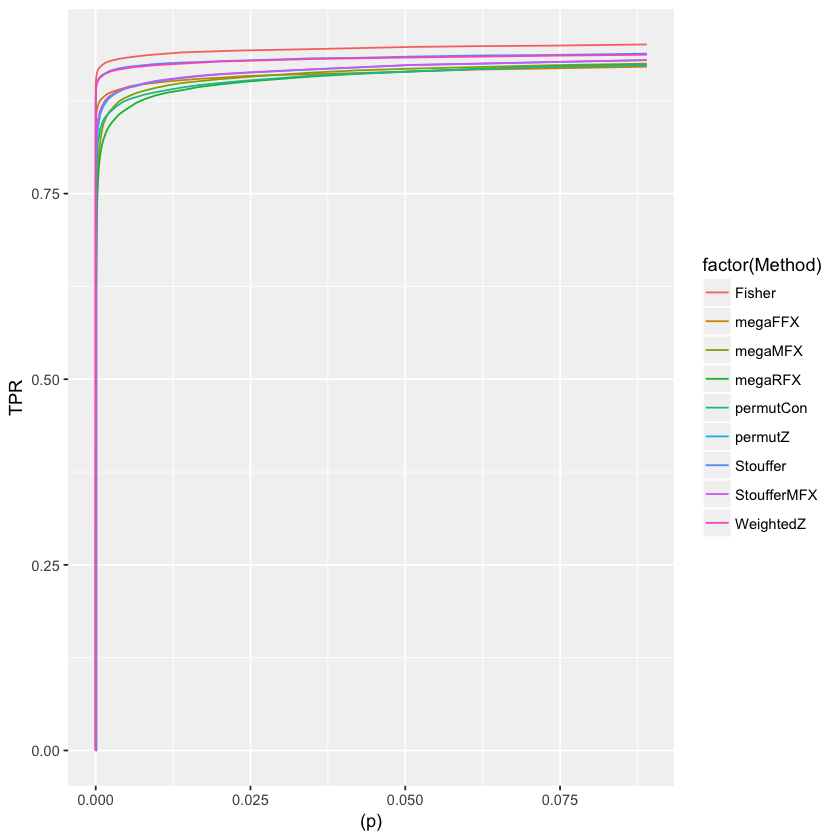

In [4]:
p <- ggplot(data=subset(realdata, p<0.1),aes(x=(p), y=TPR, group=Method, colour=factor(Method))) + 
geom_line() 
# facet_grid(.~Method) 

# aes(x=-log10(expectedP), y=-log10(P), group=allgroups, colour=factor(Within))

# + geom_ribbon(
#                 aes_ribbon, 
#                 fill="grey", alpha=.8, colour=NA) + 
#             facet_grid(Method~.) + 
#             theme(strip.text.x = element_text(size = 10)) +
#             ylab(ylabel) + xlab(xlabel) + 
#             geom_line(aes_line, colour="black") + theme(legend.position="bottom")
#     #         geom_point(size=0.5) + 

print(p)

In [5]:
simufpr <- read.csv(file.path('data', 'allsimudat_test1_k025_n20_nominal.csv'))
head(simufpr)

methods,glm,nStudies,nSubjects,Between,Within,nSubjectsSame,withinVariation,unitMism,soft2,⋯,rankP,expectedP,lnp,equivz,allgroups,expectedz,p_upper,z_upper,p_lower,z_lower
fishers,1,25,20,1,20,1,16,nominal,0,⋯,1,9.746589e-07,-49.52660,9.626282,1 20 25 20 1026000 16 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
fishers,1,25,20,1,20,1,16,nominal,0,⋯,2,1.949318e-06,-48.10786,9.479343,1 20 25 20 1026000 16 0 1 nominal,4.616714,2.360715e-07,5.037301,5.430440e-06,4.399284
fishers,1,25,20,1,20,1,16,nominal,0,⋯,3,2.923977e-06,-46.15251,9.273095,1 20 25 20 1026000 16 0 1 nominal,4.531813,6.029947e-07,4.854651,7.041588e-06,4.342560
fishers,1,25,20,1,20,1,16,nominal,0,⋯,4,3.898635e-06,-45.07518,9.157519,1 20 25 20 1026000 16 0 1 nominal,4.470676,1.062248e-06,4.741206,8.545076e-06,4.299866
fishers,1,25,20,1,20,1,16,nominal,0,⋯,5,4.873294e-06,-43.65503,9.002951,1 20 25 20 1026000 16 0 1 nominal,4.422720,1.582347e-06,4.659831,9.982025e-06,4.265292
fishers,1,25,20,1,20,1,16,nominal,0,⋯,6,5.847953e-06,-43.44453,8.979819,1 20 25 20 1026000 16 0 1 nominal,4.383181,2.146099e-06,4.596707,1.137261e-05,4.236084


In [6]:
unique(simufpr$withinVariation)
levels(simufpr$methods)[levels(simufpr$methods)=="fishers"] <- "Fisher"
levels(simufpr$methods)[levels(simufpr$methods)=="megaFFX_FSL"] <- "megaFFX"
levels(simufpr$methods)[levels(simufpr$methods)=="stouffers"] <- "Stouffer"
levels(simufpr$methods)[levels(simufpr$methods)=="stouffersMFX"] <- "StoufferMFX"
levels(simufpr$methods)[levels(simufpr$methods)=="weightedZ"] <- "WeightedZ"


[1] 16  8  4  2  1

In [8]:
simufpr$settings <- paste(simufpr$Between, simufpr$Within/simufpr$nSubjects, simufpr$withinVariation, sep='-')

# Interpolation function from theoretical TPR to observed TPR
interp_to_observed<-by(simufpr, simufpr$settings, function(df) {approxfun(x=df$P, y=df$expectedP)})

# interp_to_observed$`0-0.25-1`
print(attributes(interp_to_observed)$names[1])
oo<-attr(interp_to_observed, attributes(interp_to_observed)$names[1])
print(oo)
print(class(interp_to_observed))
# paste(simufpr["Within"], simufpr["Between"], simufpr["withinVariation"])

interp_to_observed

[1] "0-0.25-1"
NULL
[1] "by"


function (v) 
.approxfun(x, y, v, method, yleft, yright, f)
<bytecode: 0x7f9de316c270>
<environment: 0x7f9de316b920>
------------------------------------------------------------ 
function (v) 
.approxfun(x, y, v, method, yleft, yright, f)
<bytecode: 0x7f9de316c270>
<environment: 0x7f9de3309ff0>
------------------------------------------------------------ 
function (v) 
.approxfun(x, y, v, method, yleft, yright, f)
<bytecode: 0x7f9de316c270>
<environment: 0x7f9de4bbd710>
------------------------------------------------------------ 
function (v) 
.approxfun(x, y, v, method, yleft, yright, f)
<bytecode: 0x7f9de316c270>
<environment: 0x7f9de3325548>
------------------------------------------------------------ 
function (v) 
.approxfun(x, y, v, method, yleft, yright, f)
<bytecode: 0x7f9de316c270>
<environment: 0x7f9de4b925b8>
------------------------------------------------------------ 
function (v) 
.approxfun(x, y, v, method, yleft, yright, f)
<bytecode: 0x7f9de316c270>
<environment: 0x7f

In [9]:
approx_TPR <- function(y, simudf, Between, Within, withinVariation, methods) {
    sub_df = subset(simudf, Between==Between & Within==Within & withinVariation==withinVariation & methods==methods)
    approximated = approx(x=sub_df$P, y=sub_df$expectedP, xout=y)
    plot(sub_df$P, sub_df$expectedP, main = "approx")
    points(approximated, col = 2, pch = "*")
    return(approximated$y)
}

[1] 16
[1] 1 20 25 20 1026000  16 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  16 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  16 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  16 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  16 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  16 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  16 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  16 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  16 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 8
[1] 1 20 25 20 1026000  8 0 1 nominal
18 Levels: 0 

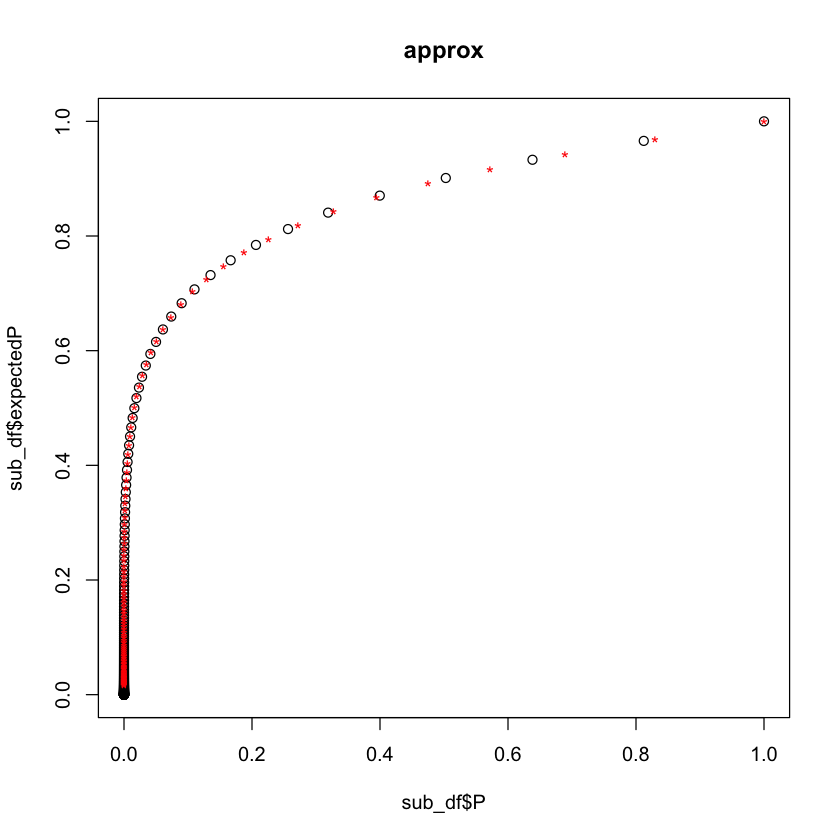

[1] 1 20 25 20 1026000  8 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  8 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  8 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  8 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  8 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  8 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  8 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  8 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 4
[1] 1 20 25 20 1026000  4 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"


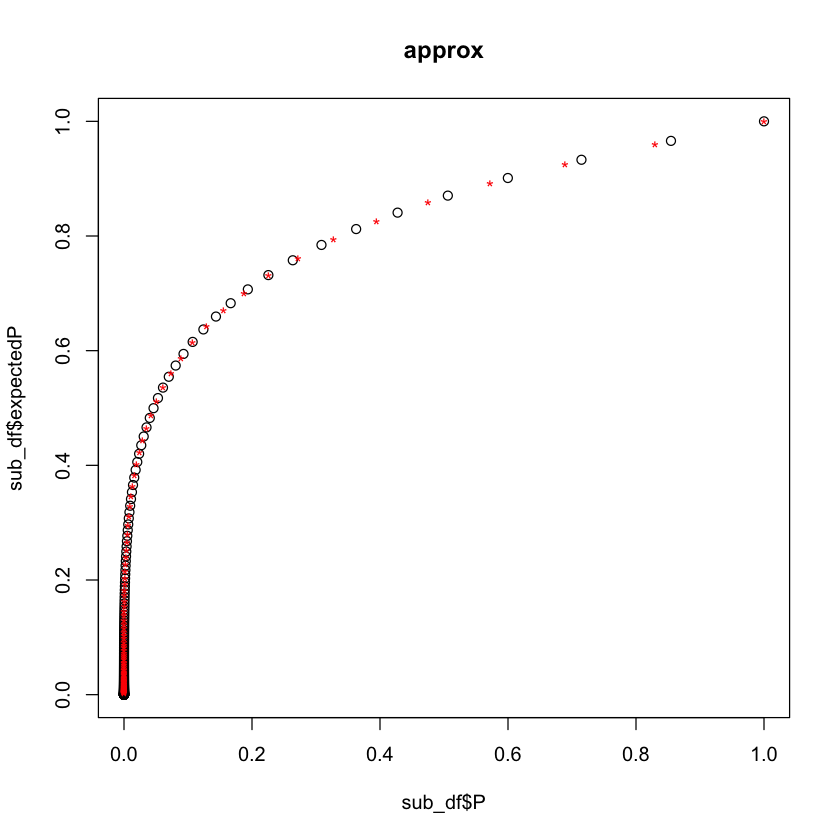

[1] 1 20 25 20 1026000  4 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  4 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  4 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  4 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  4 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  4 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  4 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  4 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 2
[1] 1 20 25 20 1026000  2 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"


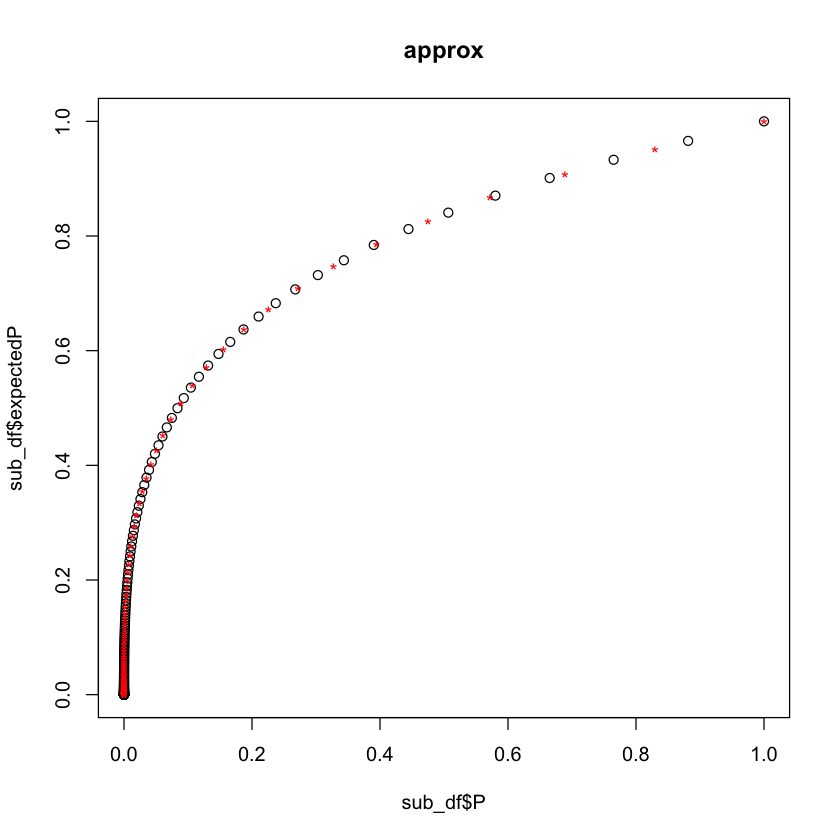

[1] 1 20 25 20 1026000  2 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  2 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  2 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  2 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  2 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  2 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  2 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  2 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1
[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"


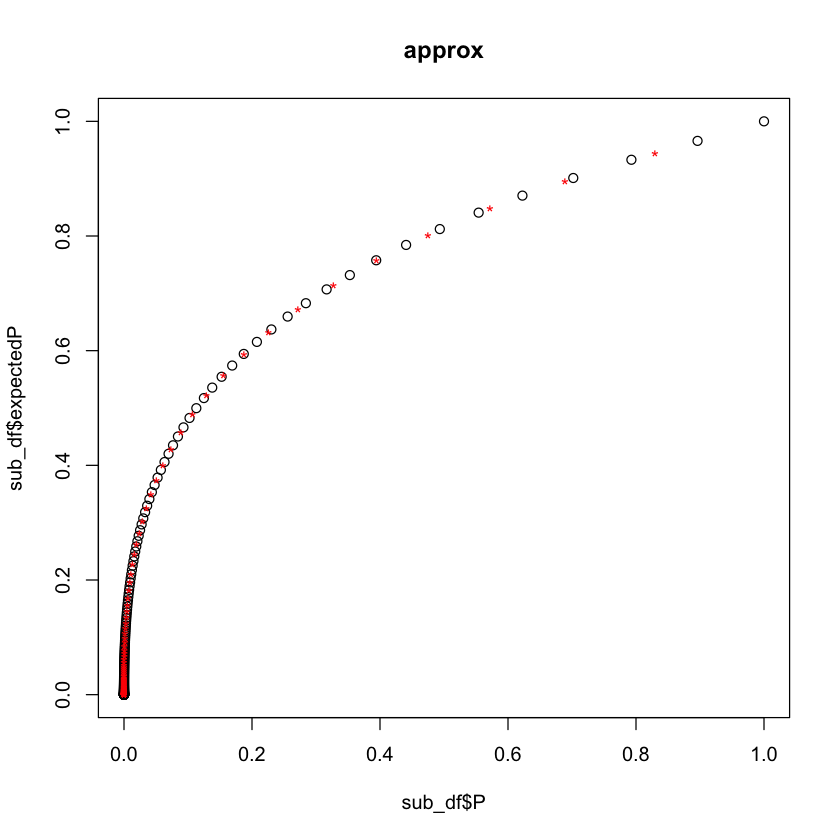

[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"
[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] "ldfhkjdhf"


[1] "methods"         "glm"             "nStudies"        "nSubjects"      
 [5] "Between"         "Within"          "nSubjectsSame"   "withinVariation"
 [9] "unitMism"        "soft2"           "soft2Factor"     "nSimu"          
[13] "minuslog10P"     "P"               "rankP"           "expectedP"      
[17] "lnp"             "equivz"          "allgroups"       "expectedz"      
[21] "p_upper"         "z_upper"         "p_lower"         "z_lower"        
[25] "settings"

[1] "Fisher"      "megaFFX"     "megaMFX"     "megaRFX"     "permutCon"  
[6] "permutZ"     "Stouffer"    "StoufferMFX" "WeightedZ"  
[1] "--"
[1] "Fisher"      "megaFFX"     "megaMFX"     "megaRFX"     "permutCon"  
[6] "permutZ"     "Stouffer"    "StoufferMFX" "WeightedZ"  


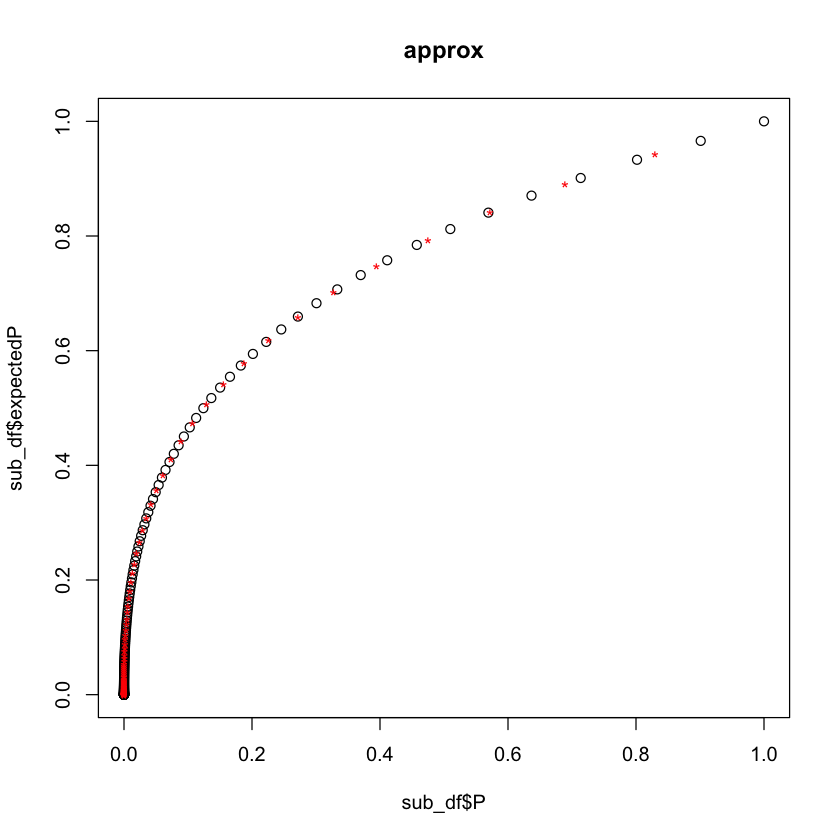

In [10]:
max_diff = 0

realdata_withsimuFPR = data.frame()

for (variation in unique(simufpr$withinVariation)){
    print(variation)
    currdat <- realdata
#     currdat$FPR <- realdata$p*NaN
    currdat$withinVariation <- variation
    currdat$Between <- 1
    currdat$Within <- 1
    currdat$FPR <- NA
    
#     approx_fun <- interp_to_observed$`0-0.25-1`
    
#     simufpr_out16 <- subset(simufpr, withinVariation==16 & Between==1) 
    methods <- levels(realdata$Method)
    length(methods)

    for (i in 1:length(methods)){
#         print(methods[i])
        th_p = currdat[currdat$Method==methods[i],]$p
        
#         print(th_p)
        
#         stored_p <- subset(simufpr, methods==methods[i] & withinVariation==variation & Within==20 & Between==1)$P
#         expected_p <- subset(simufpr, methods==methods[i] & withinVariation==variation & Within==20 & Between==1)$expectedP

#         print(length(bb))
#         print('---')
#         print(length(cc))
        # sum(is.na(match(aa,bb)))
        # length(aa)

#         oo<-approx_TPR(th_p, simufpr, 1, 1, variation, methods[i])
        
        sub_df = subset(simufpr, 
                        Between==1 & 
                        Within==20 & 
                        withinVariation==variation & 
                        methods==methods[i])
        approximated = approx(x=sub_df$P, y=sub_df$expectedP, xout=th_p)
        print(unique(sub_df$allgroups))
        print('ldfhkjdhf')
        plot(sub_df$P, sub_df$expectedP, main = "approx")
        points(approximated, col = 2, pch = "*")
#         return(approximated$y)
        oo<-approximated$y
        
#         print(oo)
         currdat[currdat$Method==methods[i],]$FPR <- oo
        
#         x <- stored_p
#         y <- expected_p

#         currdat$FPR <- with(currdat, approx(x, y, xout=th_p)) # ifelse(a==b, a+b, b-a))

        
#         print(head(y))

#         par(mfrow = c(2,1))
#         plot(x, y, main = "approx(.) and approxfun(.)")
#         currdat[currdat$Method==methods[i],]$FPR <- approx(x, y, xout=th_p)
        
        
#         print(length(th_p))
#         for (j in 1:length(th_p[1:10])){
#     #         print('---')
# #             print(paste(' j =', j))
#             stored_p = subset(simufpr, methods==methods[i] & withinVariation==variation & Between==1)$P
#             expected_p = subset(simufpr, methods==methods[i] & withinVariation==variation & Between==1)$expectedP

#     #         print(th_p[j])
#             pos = which.min(abs(stored_p-th_p[j]))
            
#             if (abs(stored_p[pos]-th_p[j]) > max_diff){
#                 max_diff = abs(stored_p[pos]-th_p[j])
#             }
# #             pos_homo = which.min(abs(stored_p_homo-th_p[j]))
#     #         print(pos)
#     #         print(stored_p[pos])
#     #         print(realdata[realdata$Method==methods[i],]$expectedP[j])
#     #         print(pos)
#     #         print(stored_p)
#     #         print(th_p[j])
#             currdat[currdat$Method==methods[i],]$FPR[j] <- expected_p[pos]


# #             realdata[realdata$Method==methods[i],]$expectedP_homo[j] <- expected_p_homo[pos_homo]
#     #         print(aa)

#     #         print(simufpr_out16[simufpr_out16$methods==methods[i] & simufpr_out16$P==th_p[j],]$expectedP)
#         }

    }
    

    realdata_withsimuFPR <- rbind(realdata_withsimuFPR, currdat)

    head(realdata)
    
}

simufpr_homo <- subset(simufpr, withinVariation==1 & Between==1 & Within==20)

simufpr_out16 <- subset(simufpr, withinVariation==16 & Between==1) 
names(simufpr_out16)

print(levels(simufpr_out16$methods))
print('--')
print(levels(realdata$Method))



[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...
[1] 331
[1] "---"
[1] 331
[1] 9.746589e-07 1.949318e-06 2.923977e-06 3.898635e-06 4.873294e-06
[6] 5.847953e-06


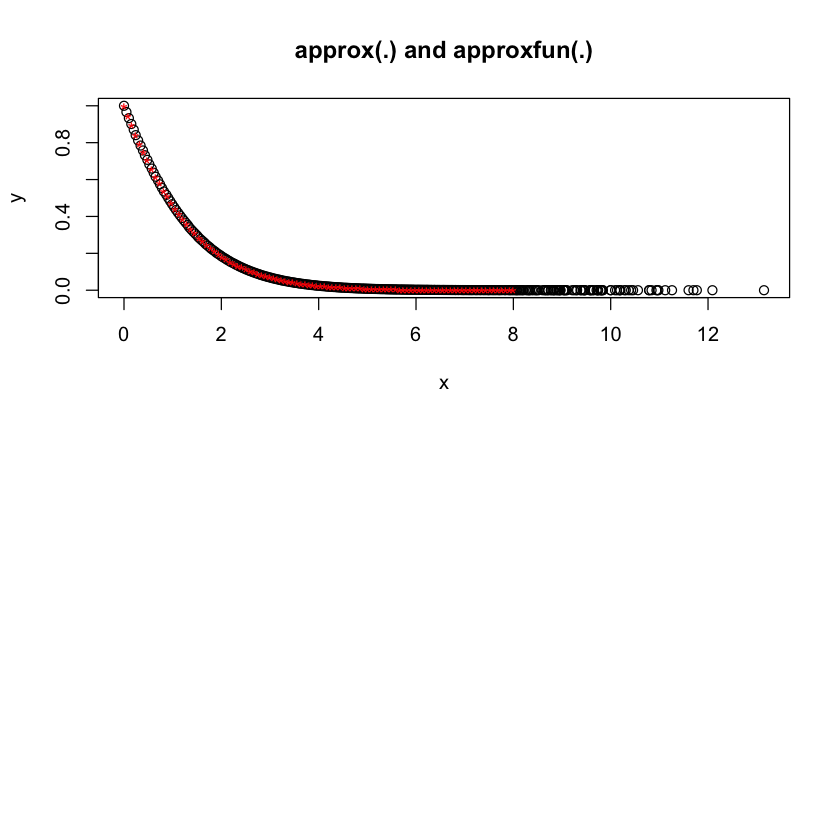

In [145]:
num_dig = 2

aa <- subset(realdata, methods==methods[i])$p
aa<- (round(-log10(aa[aa>0]), digits=num_dig))
# print(aa)

print(unique(subset(simufpr, methods==methods[i] & withinVariation==variation & Within==20 & Between==1)$allgroups))

bb <- subset(simufpr, methods==methods[i] & withinVariation==variation & Within==20 & Between==1)$P
bb<- round(-log10(bb), digits=num_dig)
cc <- subset(simufpr, methods==methods[i] & withinVariation==variation & Within==20 & Between==1)$expectedP

print(length(bb))
print('---')
print(length(cc))
# sum(is.na(match(aa,bb)))
# length(aa)

x <- bb
y <- cc

print(head(y))

par(mfrow = c(2,1))
plot(x, y, main = "approx(.) and approxfun(.)")
points(approx(x, y, xout=aa), col = 2, pch = "*")
# points(approx(x, y, method = "constant"), col = 4, pch = "*")

# f <- approxfun(x, y)
# curve(f(x), 0, 11, col = "green2")
# points(x, y)
# is.function(fc <- approxfun(x, y, method = "const")) # TRUE
# curve(fc(x), 0, 10, col = "darkblue", add = TRUE)
# ## different extrapolation on left and right side :
# plot(approxfun(x, y, rule = 2:1), 0, 11,
#      col = "tomato", add = TRUE, lty = 3, lwd = 2)

In [11]:
head(realdata_withsimuFPR)

Method,p,TPR,withinVariation,Between,Within,FPR
Fisher,0.000000e+00,0.0000000,16,1,1,NA
Fisher,1.000000e-08,0.8448477,16,1,1,0.01764057
Fisher,1.204504e-08,0.8460678,16,1,1,0.01853450
Fisher,1.450829e-08,0.8469320,16,1,1,0.01945603
Fisher,1.747528e-08,0.8486605,16,1,1,0.02048665
Fisher,2.104904e-08,0.8501856,16,1,1,0.02153186


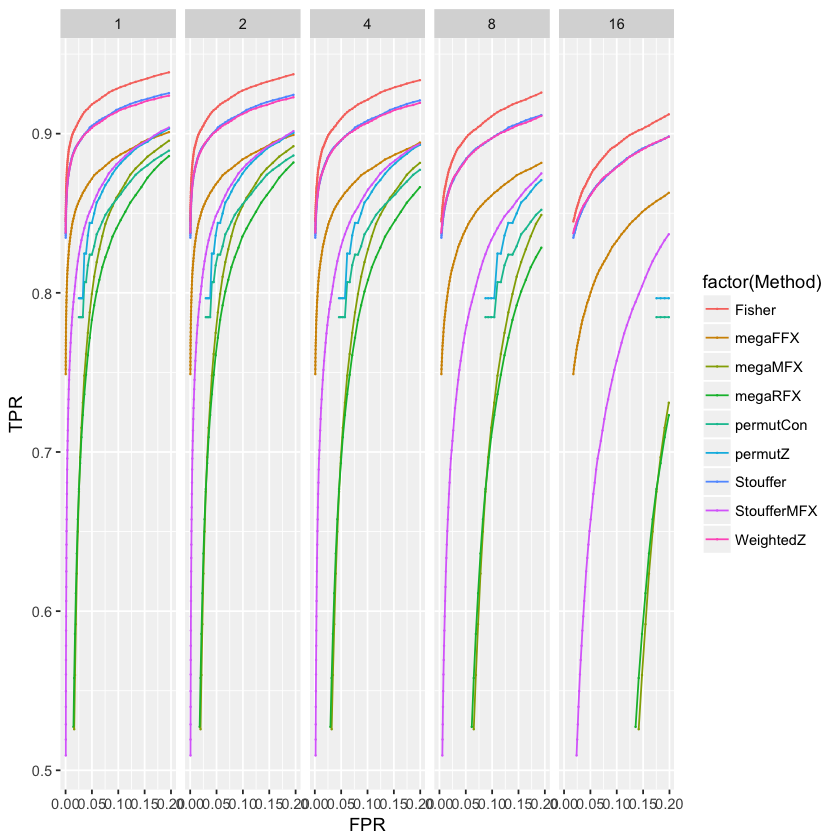

In [12]:
# print(p)

p <- ggplot(data=subset(realdata_withsimuFPR, FPR<=0.20 & TPR>0.5),
            aes(x=FPR, y=TPR, group=Method, colour=factor(Method))) + geom_point(size=0.02) + geom_line() + 
             facet_grid(. ~ withinVariation)

print(p)

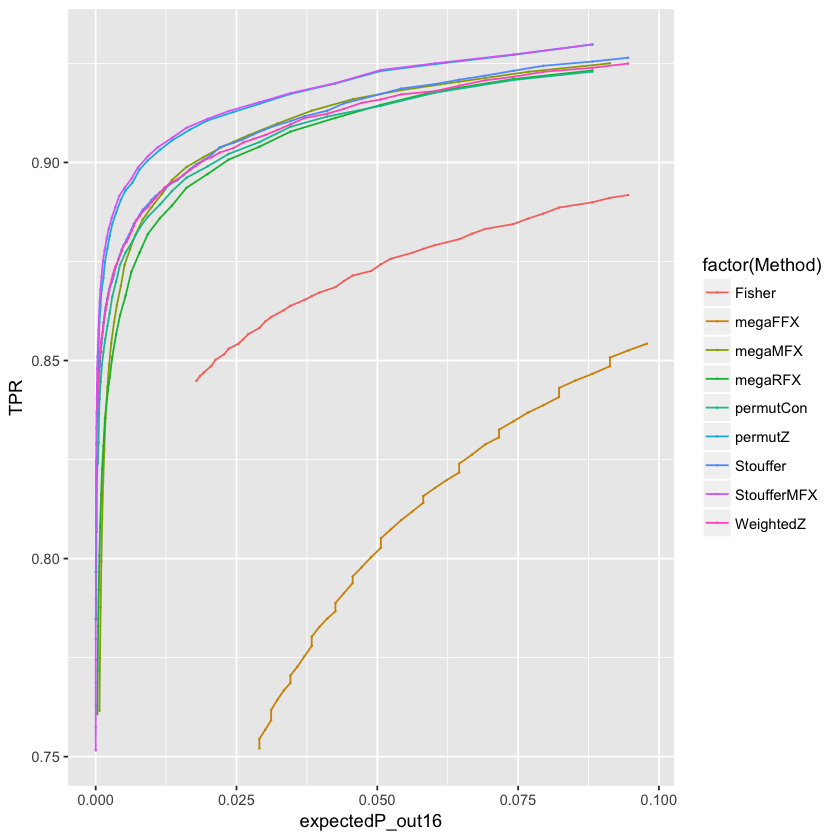

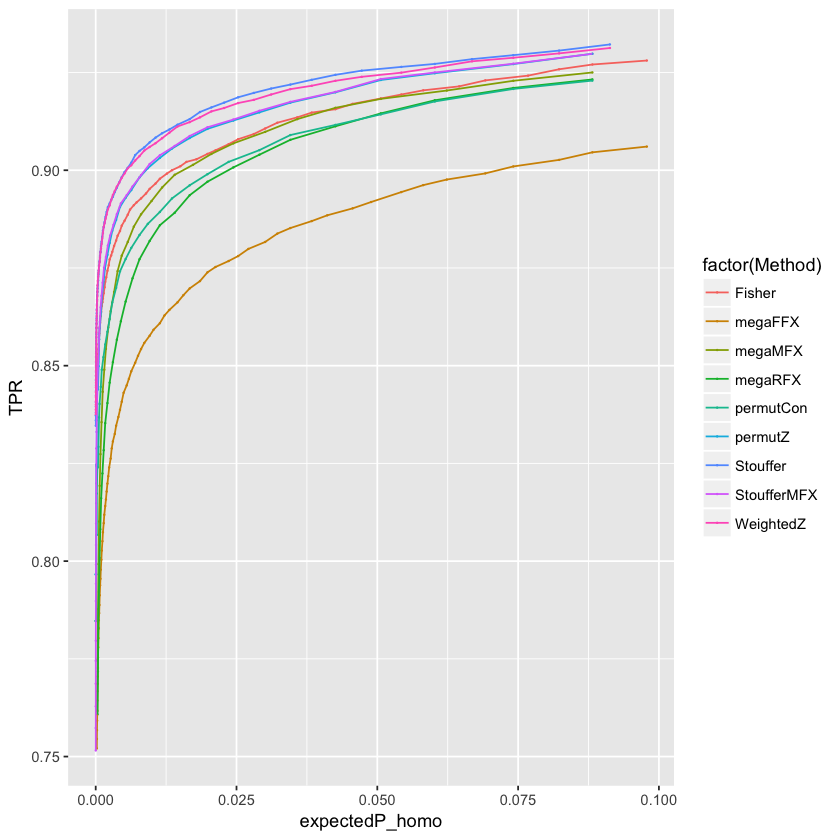

In [10]:
# p <- ggplot(data=subset(realdata, p<=0.1 & TPR>0.75),aes(x=p, y=TPR, group=Method, colour=factor(Method))) + 
# geom_point(size=0.02) + geom_line()
# print(p)

p <- ggplot(data=subset(realdata, expectedP_out16<=0.1 & TPR>0.75),aes(x=expectedP_out16, y=TPR, group=Method, colour=factor(Method))) + 
geom_point(size=0.02) + geom_line()
print(p)

p <- ggplot(data=subset(realdata, expectedP_homo<=0.1 & TPR>0.75),aes(x=expectedP_homo, y=TPR, group=Method, colour=factor(Method))) + 
geom_point(size=0.02) + geom_line()
print(p)

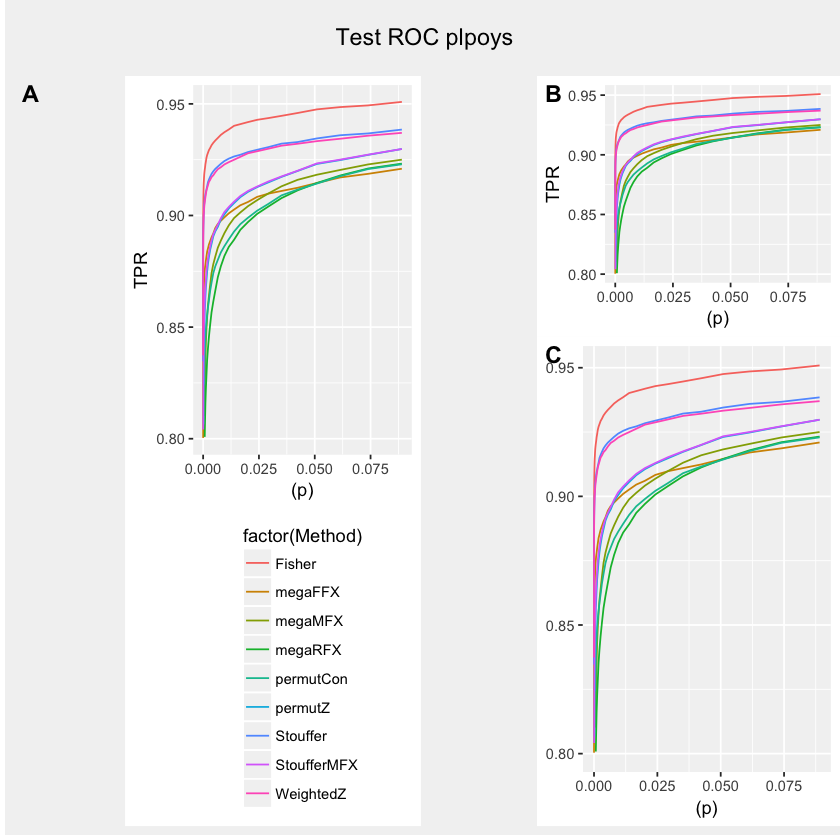

In [35]:
roc_plot <- function() {
    p <- ggplot(data=subset(realdata, p<0.1 & TPR>0.8),aes(x=(p), y=TPR, group=Method, colour=factor(Method))) + 
    geom_line()
    return(p)
}
    

roc_plots <- function(data){
              
    # Panel A: small samples
    p1 <- roc_plot() + theme(legend.position="bottom", legend.direction='vertical') + coord_fixed(ratio = 1)
    
    # Panel B: heteroscedasticity
    p2 <- roc_plot() + theme(legend.position="none") 

    # Panel C: heterogeneity
    p3 <- roc_plot() + theme(legend.position="none") + ylab(NULL)
    
    # Organise the figure: title, panel A at the top, panel B and C in a second row
    right_column <- plot_grid(p1, labels = 'A', ncol=1)
   
    widths = c(0.4, 0.75)
    
    left_column <- plot_grid(p2, p3, labels = c('B', 'C'), ncol=1, rel_heights=widths)
    
    p <- plot_grid(right_column, left_column, labels = ' ', ncol=2, rel_widths=c(1.7, 1))
    title <- ggdraw() + draw_label(
        'Test ROC plpoys')
    p <- plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1)) + 
        theme(plot.title=element_text(size=12), text=element_text(size=10))

    return(p)
}

p <- roc_plots(realdata)

# print on screen
print(p)